In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
os.getcwd()

'E:\\Rudhra\\Study for reputation\\Jigsaw acadamy materials\\GLM_Statistical Modeling\\Case Study_Graded assignment'

In [6]:
os.listdir()

['.ipynb_checkpoints',
 '.RData',
 '.Rhistory',
 'adult.csv',
 'Graded assignment back up.R',
 'Instruction 1.png',
 'Instruction 2.png',
 'Instruction 3.png',
 'practice codes in assignment.R',
 'Ruthramurthi_GradedAssignment_Codes.R',
 'Ruthramurthi_GradedAssignment_Codes_Final.R',
 'Untitled.ipynb']

In [8]:
adult_data = pd.read_csv('adult.csv')

In [11]:
adult_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [14]:
adult_data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [16]:
adult_data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
adult_data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [22]:
adult_data.age.describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [24]:
adult_data.income.describe()

count     48842
unique        2
top       <=50K
freq      37155
Name: income, dtype: object

In [28]:
adult_data.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [31]:
adult_data.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [37]:
adult_data['Target'] =adult_data.income.map(lambda x: 1 if x=='>50K' else 0)

In [40]:
adult_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0


In [42]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [64]:
adult_mod = smf.glm("Target~age+fnlwgt+adult_data['educational-num']+adult_data['capital-gain']+adult_data['capital-loss']+adult_data['hours-per-week']+gender+occupation",
                   family=sm.families.Binomial(), data=adult_data).fit()

In [54]:
adult_data.shape

(48842, 16)

In [56]:
adult_data['educational-num'].describe()

count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: educational-num, dtype: float64

In [65]:
adult_data['educational-num'].isnull().sum()

0

In [67]:
adult_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                48842
Model:                            GLM   Df Residuals:                    48820
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18471.
Date:                Sat, 11 Jan 2020   Deviance:                       36943.
Time:                        21:11:07   Pearson chi2:                 1.14e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -8.9017      0.135    -66.112      0.000      -9.166      -8.638
gender[T.Male]                      1.1835      0.035     33.929      0.000       1.115       1.252
occupation[T.Adm-clerical]          0.7590      0.089      8.574      0.000       0.585       0.932
occupation[T.Armed-Forces]          1.4079      0.657      2.143      0.032       0.120       2.696
occupation[T.Craft-repair]          0.8677      0.084     10.311      0.000       0.703       1.033
occupation[T.Exec-managerial]       1.5216      0.083     18.352      0.000       1.359       1.684
occupation[T.Farming-fishing]      -0.4114      0.122     -3.361      0.001      -0.651      -0.171
occupation[T.Handlers-cleaners]    -0.0576      0.122     -0.472      0.637      -0.297       0.182
occupation[T.Machine-op-inspct]     0.5151      0.098      5.277      0.000       0.324       0.706
occupation[T.Other-service]        -0.3335      0.109     -3.068      0.002      -0.546      -0.120
occupation[T.Priv-house-serv]      -1.7404      0.742     -2.344      0.019      -3.196      -0.285
occupation[T.Prof-specialty]        1.2417      0.085     14.694      0.000       1.076       1.407
occupation[T.Protective-serv]       1.1650      0.109     10.718      0.000       0.952       1.378
occupation[T.Sales]                 0.9746      0.085     11.443      0.000       0.808       1.142
occupation[T.Tech-support]          1.2350      0.101     12.170      0.000       1.036       1.434
occupation[T.Transport-moving]      0.6817      0.096      7.112      0.000       0.494       0.870
age                                 0.0415      0.001     38.751      0.000       0.039       0.044
fnlwgt                           3.509e-07   1.26e-07      2.796      0.005    1.05e-07    5.97e-07
adult_data['educational-num']       0.2524      0.007     37.411      0.000       0.239       0.266
adult_data['capital-gain']          0.0003   8.21e-06     38.492      0.000       0.000       0.000
adult_data['capital-loss']          0.0006   2.74e-05     23.347      0.000       0.001       0.001
adult_data['hours-per-week']        0.0306      0.001     26.291      0.000       0.028       0.033
===================================================================================================
"""

In [68]:
adult_mod.null_deviance

53750.68147228964

In [69]:
adult_mod.aic

36986.9598648196

In [70]:
1-(36943/53751)

0.3127011590482037

AttributeError: 'GLMResults' object has no attribute 'coef_'

In [73]:
np.exp(1.1835)

3.2657844689173556

In [77]:
from sklearn.linear_model import LogisticRegression

In [83]:
type(adult_mod.params)

pandas.core.series.Series

In [84]:
np.exp(adult_mod.params)

Intercept                          0.000136
gender[T.Male]                     3.265936
occupation[T.Adm-clerical]         2.136082
occupation[T.Armed-Forces]         4.087350
occupation[T.Craft-repair]         2.381481
occupation[T.Exec-managerial]      4.579349
occupation[T.Farming-fishing]      0.662718
occupation[T.Handlers-cleaners]    0.943986
occupation[T.Machine-op-inspct]    1.673826
occupation[T.Other-service]        0.716443
occupation[T.Priv-house-serv]      0.175449
occupation[T.Prof-specialty]       3.461457
occupation[T.Protective-serv]      3.205974
occupation[T.Sales]                2.650125
occupation[T.Tech-support]         3.438517
occupation[T.Transport-moving]     1.977218
age                                1.042350
fnlwgt                             1.000000
adult_data['educational-num']      1.287050
adult_data['capital-gain']         1.000316
adult_data['capital-loss']         1.000640
adult_data['hours-per-week']       1.031104
dtype: float64

In [85]:
import sklearn.metrics as metrics

In [87]:
pred = adult_mod.predict(adult_data)

In [88]:
pred.head()

0    0.043319
1    0.061846
2    0.265001
3    0.701852
4    0.009227
dtype: float64

In [89]:
pred.describe()

count    48842.000000
mean         0.239282
std          0.249660
min          0.000204
25%          0.050940
50%          0.143397
75%          0.345479
max          1.000000
dtype: float64

In [91]:
pred_d = pred.map(lambda x: 1 if x>0.5 else 0)

In [92]:
metrics.confusion_matrix(adult_data.Target, pred_d)

array([[35050,  2105],
       [ 6216,  5471]], dtype=int64)

In [93]:
metrics.accuracy_score(adult_data.Target, pred_d)

0.8296343311084722

In [94]:
metrics.auc

<function sklearn.metrics.ranking.auc(x, y, reorder='deprecated')>

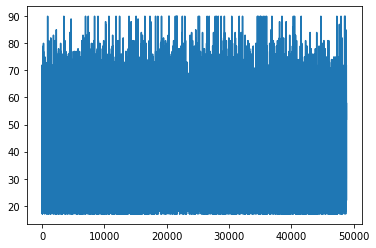

In [96]:
plt.plot(adult_data.age)

(array([8432., 8686., 9120., 9157., 5965., 3876., 2456.,  777.,  277.,
          96.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

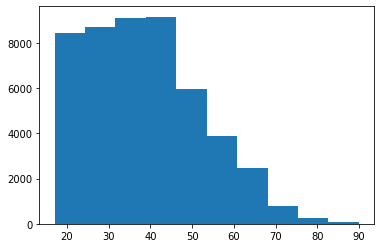

In [98]:
plt.hist(adult_data.age)

In [99]:
adult_mod1 = smf.glm("Target~gender", family=sm.families.Binomial(), data=adult_data).fit()

In [103]:
adult_mod1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                48842
Model:                            GLM   Df Residuals:                    48840
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25633.
Date:                Sun, 12 Jan 2020   Deviance:                       51266.
Time:                        10:40:32   Pearson chi2:                 4.88e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.0984      0.025    -83.297      0.000      -2.148      -2.049
gender[T.Male]     1.2690      0.028     45.453      0.000       1.214       1.324
==================================================================================
"""

In [102]:
adult_mod1.aic

51270.45316812068

In [104]:
adult_mod1 = smf.glm("Target~adult_data['educational-num']", family=sm.families.Binomial(), data=adult_data).fit()

In [105]:
adult_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                48842
Model:                            GLM   Df Residuals:                    48840
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23887.
Date:                Sun, 12 Jan 2020   Deviance:                       47775.
Time:                        10:43:26   Pearson chi2:                 5.09e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -5.0042      0.058    -86.551      0.000      -5.117      -4.891
adult_data['educational-num']     0.3621      0.005     70.606      0.000       0.352       0.372
=================================================================================================
"""

In [106]:
adult_mod1.aic

47778.689623493854

In [107]:
adult_mod1 = smf.glm("Target~occupation", family=sm.families.Binomial(), data=adult_data).fit()

In [108]:
adult_mod1.aic

47560.91677759862

In [109]:
adult_mod1 = smf.glm("Target~age", family=sm.families.Binomial(), data=adult_data).fit()

In [110]:
adult_mod1.aic

51217.72985534389

In [111]:
adult_mod1 = smf.glm("Target~fnlwgt", family=sm.families.Binomial(), data=adult_data).fit()

In [112]:
adult_mod1.aic

53752.71153406145

In [113]:
adult_mod1 = smf.glm("Target~adult_data['capital-gain']", family=sm.families.Binomial(), data=adult_data).fit()

In [114]:
adult_mod1.aic

48703.58202904805

In [115]:
adult_mod1 = smf.glm("Target~adult_data['capital-loss']", family=sm.families.Binomial(), data=adult_data).fit()

In [116]:
adult_mod1.aic

52853.065142633204

In [117]:
adult_mod1 = smf.glm("Target~adult_data['hours-per-week']", family=sm.families.Binomial(), data=adult_data).fit()

In [118]:
adult_mod1.aic

51164.23040676444

In [119]:
sorted([51270, 47779, 47561, 51218, 53753, 48704, 52853, 51164])

[47561, 47779, 48704, 51164, 51218, 51270, 52853, 53753]

#Sorted values: 47561, 47779, 48704, 51164, 51218, 51270, 52853, 53753

##### occupation > educational.num > capital.gain > hours.per.week > age > gender > capital.loss > fnlwgt

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [123]:
from patsy import dmatrices

In [126]:
y, X = dmatrices("""Target~age+fnlwgt+adult_data['educational-num']+adult_data['capital-gain']+adult_data['capital-loss']+adult_data['hours-per-week']+gender+occupation+
                  workclass+education+adult_data['marital-status']+relationship+race+adult_data['native-country']""", data=adult_data, return_type= 'dataframe')

In [124]:
adult_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0


In [127]:
y.head()

,Target
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0


In [128]:
X.head()

,Intercept,gender[T.Male],occupation[T.Adm-clerical],occupation[T.Armed-Forces],occupation[T.Craft-repair],occupation[T.Exec-managerial],occupation[T.Farming-fishing],occupation[T.Handlers-cleaners],occupation[T.Machine-op-inspct],occupation[T.Other-service],...,adult_data['native-country'][T.Trinadad&Tobago],adult_data['native-country'][T.United-States],adult_data['native-country'][T.Vietnam],adult_data['native-country'][T.Yugoslavia],age,fnlwgt,adult_data['educational-num'],adult_data['capital-gain'],adult_data['capital-loss'],adult_data['hours-per-week']
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,25.0,226802.0,7.0,0.0,0.0,40.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,38.0,89814.0,9.0,0.0,0.0,50.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,28.0,336951.0,12.0,0.0,0.0,40.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,44.0,160323.0,10.0,7688.0,0.0,40.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,18.0,103497.0,10.0,0.0,0.0,30.0


In [121]:
vif = DataFrame()

In [129]:
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [130]:
vif['features'] = X.columns

In [131]:
vif

,VIF Factor,features
0,0.000000,Intercept
1,1.996900,gender[T.Male]
2,inf,occupation[T.Adm-clerical]
3,inf,occupation[T.Armed-Forces]
4,inf,occupation[T.Craft-repair]
5,inf,occupation[T.Exec-managerial]
6,inf,occupation[T.Farming-fishing]
7,inf,occupation[T.Handlers-cleaners]
8,inf,occupation[T.Machine-op-inspct]
9,inf,occupation[T.Other-service]
